In [59]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import os
import pandas as pd
import seaborn as sns

auc_matrix = []
auc_matrix_dnase = []

result_dir = "/storage/pandaman/project/AgentBind-GM12878-DanQ-unfixed-rnn-trans-GC-balanced//storage/AgentBind-GM12878-DanQ/results-cross-TFs/"
result_dir_dnase = "/storage/pandaman/project/AgentBind-GM12878-DanQ-unfixed-rnn-trans-DNased-filter/storage/AgentBind-GM12878-DanQ/results-cross-TFs/"

# Reorder based on DNase diff
data = pd.read_csv("agentbind-modelcontrols.csv")
data["diff-Dnase"] = data.apply(lambda x: x["auROC-GC-Dnase"]-x["auROC-GC"], 1)
data = data.sort_values("diff-Dnase", ascending=True)
#data = data.sort_values("auROC-GC")
TF_list = [item for item in list(data["TF"]) if "%s+GM12878"%item in os.listdir(result_dir)]

for source_TF in TF_list:
    auc_list = []
    auc_list_dnase = []
    for target_TF in TF_list:
        elems = open("%s/%s+GM12878/%s+GM12878/auc_summary.txt"%(result_dir, source_TF, target_TF)).readline().split()
        auc_val = float(elems[1])
        auc_list.append(auc_val)
        # Update DNAse
        elems = open("%s/%s+GM12878/%s+GM12878/auc_summary.txt"% (result_dir_dnase, source_TF, target_TF)).readline().split()
        auc_val = float(elems[1])
        auc_list_dnase.append(auc_val)
    auc_matrix.append(auc_list)
    auc_matrix_dnase.append(auc_list_dnase)
    

Populating the interactive namespace from numpy and matplotlib


In [48]:
print ("These datasets can be predicted better with models of other TFs:")
ind = 0
labels = ["GC","GC+Dnase"]
for am in [auc_matrix, auc_matrix_dnase]:
    print(labels[ind])
    for target_TF_idx in range(len(TF_list)):
        auc_list = [am[source_TF_idx][target_TF_idx] for source_TF_idx in range(len(TF_list))]
        if max(auc_list) > am[target_TF_idx][target_TF_idx]:
            print("Dataset: %s, its own model: %f, better model: %s (%f)" %(\
                TF_list[target_TF_idx], am[target_TF_idx][target_TF_idx],\
                TF_list[auc_list.index(max(auc_list))], max(auc_list)))
    ind += 1

These datasets can be predicted better with models of other TFs:
GC
Dataset: MEF2C, its own model: 0.956828, better model: MEF2A (0.962495)
Dataset: STAT3, its own model: 0.922203, better model: NFIC (0.931206)
Dataset: ETS1, its own model: 0.911168, better model: ELK1 (0.917126)
Dataset: NFYA, its own model: 0.976942, better model: USF2 (0.979279)
GC+Dnase
Dataset: CEBPB, its own model: 0.587500, better model: EBF1 (0.810417)
Dataset: STAT1, its own model: 0.718750, better model: MEF2C (0.843750)
Dataset: MEF2C, its own model: 0.717305, better model: EBF1 (0.766946)
Dataset: STAT3, its own model: 0.692763, better model: NFYB (0.754605)
Dataset: POU2F2, its own model: 0.689883, better model: PBX3 (0.731965)
Dataset: RUNX3, its own model: 0.667078, better model: ETS1 (0.690135)
Dataset: SRF, its own model: 0.606306, better model: STAT3 (0.678604)
Dataset: MEF2A, its own model: 0.760742, better model: RUNX3 (0.770996)


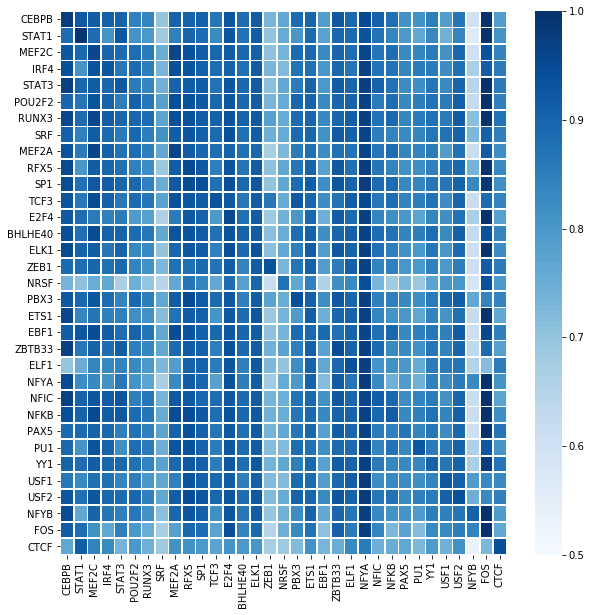

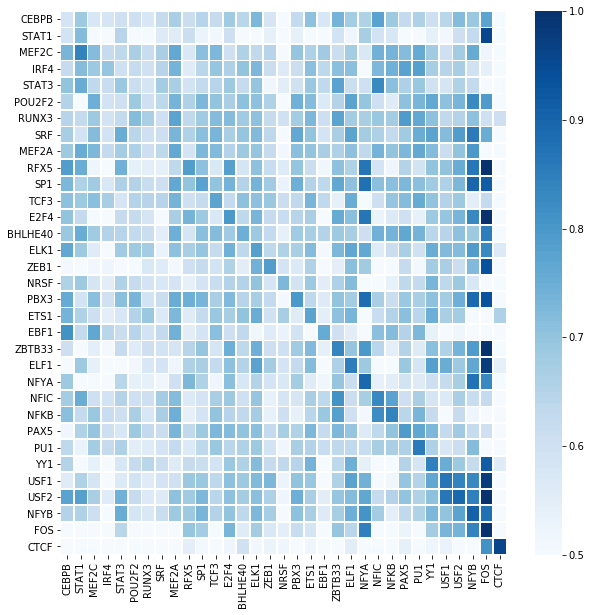

In [62]:
df = pd.DataFrame(data = numpy.array(auc_matrix), index = TF_list, columns = TF_list)
df_dnase = pd.DataFrame(data = numpy.array(auc_matrix_dnase), index=TF_list, columns=TF_list)
#df = df.reindex(TF_reorder, axis='columns')
#df = df.reindex(TF_reorder, axis='rows')

# rows are model, cols are TF being predicted

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches((10,10))
sns.heatmap(df, vmin=0.5, vmax=1, linewidths=.75, cmap=sns.color_palette("Blues", 100), ax=ax)
fig.savefig("pdfs/AgentBind_ED1_Heatmap-GC.pdf")

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches((10,10))
sns.heatmap(df_dnase, vmin=0.5, vmax=1, linewidths=.75, cmap=sns.color_palette("Blues", 100), ax=ax)
fig.savefig("pdfs/AgentBind_ED1_Heatmap-DNase.pdf")